In [1]:
# initialize environment
from urbantrips.datamodel.misc import create_line_and_branches_metadata
from urbantrips.utils import utils

# Check config file consistency
utils.check_config()

# Create basic dir structure:
utils.create_directories()

# Create DB:
utils.create_db()
# create_line_and_branches_metadata()

Chequeando archivo de configuracion
Proceso de chequeo de archivo de configuración concluido con éxito
create_db Bases abiertas con exito
Tablas originales creadas
Fin crear base
 Finalizado. Tardo 0.14 segundos


In [2]:
# # process_transactions
# from urbantrips.datamodel import legs, trips
# from urbantrips.datamodel import transactions as trx
# from urbantrips.destinations import destinations as dest
# from urbantrips.geo import geo
# from urbantrips.carto import carto
# from urbantrips.utils import utils



# # Check config file consistency
# utils.check_config()

# # Read config file
# configs = utils.leer_configs_generales()
# geolocalizar_trx_config = configs["geolocalizar_trx"]

# # trx configs
# nombres_variables_trx = configs["nombres_variables_trx"]
# formato_fecha = configs["formato_fecha"]
# col_hora = configs["columna_hora"]
# tipo_trx_invalidas = configs["tipo_trx_invalidas"]
# nombre_archivo_trx = configs["nombre_archivo_trx"]

# tolerancia_parada_destino = configs["tolerancia_parada_destino"]
# resolucion_h3 = configs["resolucion_h3"]
# trx_order_params = {
#     "criterio": configs["ordenamiento_transacciones"],
#     "ventana_viajes": configs["ventana_viajes"],
#     "ventana_duplicado": configs["ventana_duplicado"],
# }

# # gps configs
# if geolocalizar_trx_config:
#     nombre_archivo_gps = configs["nombre_archivo_gps"]
#     nombres_variables_gps = configs["nombres_variables_gps"]
# else:
#     nombre_archivo_gps = None
#     nombres_variables_gps = None

# # Compute tolerance in h3 ring
# ring_size = geo.get_h3_buffer_ring_size(
#     resolucion_h3, tolerancia_parada_destino
# )

# # Produce transaction table
# trx.create_transactions(geolocalizar_trx_config,
#                         nombre_archivo_trx,
#                         nombres_variables_trx,
#                         formato_fecha,
#                         col_hora,
#                         tipo_trx_invalidas,
#                         nombre_archivo_gps,
#                         nombres_variables_gps)

# # Turn transactions into legs
# legs.create_legs_from_transactions(trx_order_params)

# # Update destination validation matrix
# carto.update_stations_catchment_area(ring_size=ring_size)

# # Infer legs destinations
# dest.infer_destinations()

# # Fix trips with same OD
# trips.rearrange_trip_id_same_od()

# # Produce trips and users tables from legs
# trips.create_trips_from_legs()

# # Upload route geometries
# carto.upload_routes_geoms()

# # Inferir route geometries based on legs data
# carto.infer_routes_geoms(plotear_lineas=False)

In [1]:
# run_postprocessing

from urbantrips.datamodel.misc import persist_datamodel_tables
from urbantrips.kpi import kpi
from urbantrips.viz import viz
from urbantrips.viz_ppt_utils import viz_ppt_utils
from urbantrips.carto import carto
from urbantrips.utils import utils
import os
os.environ['USE_PYGEOS'] = '0'
utils.check_config()

# # Compute and viz route section load by line
# kpi.compute_route_section_load(id_linea=False, rango_hrs=False)
# viz.visualize_route_section_load(id_linea=False, rango_hrs=False)

# # Create TAZs
# carto.create_zones_table()

# # Create voronoi TAZs
# carto.create_voronoi_zones()

# # Create distances table
# carto.create_distances_table(use_parallel=True)

# # Persist datamodel into csv tables
# persist_datamodel_tables()

# Poduce main viz
# viz.create_visualizations()

viz_ppt_utils.create_ppt()

# # Compute KPI
# kpi.compute_kpi()



C:\Users\sanap\miniconda3\envs\urbantrips\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
D:\sanapolsky\Google Drive\Python 2.0\github\UrbanTrips\UrbanTrips\urbantrips\kpi\kpi.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shape

Chequeando archivo de configuracion
Proceso de chequeo de archivo de configuración concluido con éxito
Noviembre 2022 (Fines de semana)

resultados\ppts\amba2_muestra10__2022-11(Fines de semana).pptx



In [4]:
desc_dia = '11/2022'
desc_dia[-4:]

'2022'

In [13]:
from urbantrips.utils.utils import (
    leer_configs_generales,
    traigo_db_path,
    iniciar_conexion_db,
    leer_alias)
import pandas as pd
import sqlite3
import os
import yaml


pd.options.mode.chained_assignment = None



def leer_alias(tipo='data'):
    """
    Esta funcion toma un tipo de datos (data o insumos)
    y devuelve el alias seteado en el archivo de congifuracion
    """
    configs = leer_configs_generales()
    # Setear el tipo de key en base al tipo de datos
    if tipo == 'data':
        key = 'alias_db_data'
    elif tipo == 'insumos':
        key = 'alias_db_insumos'
    elif tipo == 'dash':
        key = 'alias_db_data'
    else:
        raise ValueError('tipo invalido: %s' % tipo)
    # Leer el alias
    try:
        alias = configs[key] + '_'
    except KeyError:
        alias = ''
    print('alias', alias)
    return alias


def traigo_db_path(tipo='data'):
    """
    Esta funcion toma un tipo de datos (data o insumos)
    y devuelve el path a una base de datos con esa informacion
    """
    if tipo not in ('data', 'insumos', 'dash'):
        raise ValueError('tipo invalido: %s' % tipo)

    alias = leer_alias(tipo)
    db_path = os.path.join("data", "db", f"{alias}{tipo}.sqlite")

    return db_path


def iniciar_conexion_db(tipo='data'):
    """"
    Esta funcion toma un tipo de datos (data o insumos)
    y devuelve una conexion sqlite a la db
    """
    db_path = traigo_db_path(tipo)
    print(db_path)
    conn = sqlite3.connect(db_path, timeout=10)
    return conn


# Leer informacion de viajes y distancias
conn_data = iniciar_conexion_db(tipo='data')
conn_insumos = iniciar_conexion_db(tipo='insumos')

viajes = pd.read_sql_query(
    """
    SELECT *
    FROM viajes
    """,
    conn_data,
)

factores_expansion = pd.read_sql_query(
    """
    SELECT *
    FROM factores_expansion
    """,
    conn_data,
)

distancias = pd.read_sql_query(
    """
    SELECT *
    FROM distancias
    """,
    conn_insumos,
)

conn_insumos.close()
conn_data.close()

alias amba2_muestra10_
data\db\amba2_muestra10_data.sqlite
alias amba_
data\db\amba_insumos.sqlite


In [ ]:
import geopandas as gpd
import pandas as pd
import os
alias ='amba2_muestra10_'
desc_dia = '11/2022'
tipo_dia = 'Fin de semana'
var_zona = 'h3_r6'
filtro1 = 'Todos'
# df_agg = gpd.read_file('D:\\sanapolsky\\Google Drive\\Python 2.0\\github\\UrbanTrips\\UrbanTrips\\resultados\\tmp\\amba2_muestra10_2022-11(Fin de semana)_h3_r7_lineas_deseo.geojson')
# df_agg.head()

In [ ]:
df_agg[((df_agg.alias==alias[:-1])&
       (df_agg.desc_dia==desc_dia)&
       (df_agg.tipo_dia==tipo_dia)&
       (df_agg.var_zona==var_zona.replace('h3_r', 'H3 Resolucion '))&
        (df_agg.filtro1==filtro1)
      )]

In [53]:
# if not 'h3_r' in var_zona:
#     df_folium = df_agg.copy()
#     df_folium.columns = ['origen', 'destino', 'factor_expansion', 'lon_o', 'lat_o', 'lon_d', 'lat_d', 'cumsum', 'geometry']

#     df_folium['alias'] = alias[:-1]
#     df_folium['desc_dia'] = desc_dia
#     df_folium['tipo_dia'] = tipo_dia
#     df_folium['var_zona'] = var_zona.replace('h3_r', 'H3 Resolucion ')
#     df_folium['filtro1'] = filtro1

#     db_path = os.path.join(
#                         "resultados", "tmp", f"dash_lineas_deseo.geojson")

#     if os.path.isfile(db_path):
#         df_folium_ant = gpd.read_file(db_path)
#         df_folium_ant = df_folium_ant[~((df_folium_ant.alias==alias[:-1])&
#                                        (df_folium_ant.desc_dia==desc_dia)&
#                                        (df_folium_ant.tipo_dia==tipo_dia)&
#                                        (df_folium_ant.var_zona==var_zona.replace('h3_r', 'H3 Resolucion '))&
#                                         (df_folium_ant.filtro1==filtro1)
#                                       )]

#         df_folium=pd.concat([df_folium_ant, df_folium], ignore_index=True)

#     df_folium.to_file(db_path)
# print(len(df_folium))

43554


In [5]:
db_path = os.path.join(
                    "resultados", "tmp", f"dash_lineas_deseo.geojson")

if os.path.isfile(db_path):
    df_folium = gpd.read_file(db_path)
print(len(df_folium))
df_folium

                    


126345


,origen,destino,factor_expansion,lon_o,lat_o,lon_d,lat_d,cumsum,alias,desc_dia,tipo_dia,var_zona,filtro1,geometry
0,1,2,900903,-58.435626,-34.622250,-58.696472,-34.563024,69.0,amba2_muestra10,11/2022,Fin de semana,Zona_voi,Todos los viajes,"LINESTRING (-58.43563 -34.62225, -58.69647 -34..."
1,1,3,735048,-58.435626,-34.622250,-58.474399,-34.803115,84.0,amba2_muestra10,11/2022,Fin de semana,Zona_voi,Todos los viajes,"LINESTRING (-58.43563 -34.62225, -58.47440 -34..."
2,5,1,314814,-58.259580,-34.783770,-58.435626,-34.622250,95.0,amba2_muestra10,11/2022,Fin de semana,Zona_voi,Todos los viajes,"LINESTRING (-58.25958 -34.78377, -58.43563 -34..."
3,5,3,84551,-58.259580,-34.783770,-58.474399,-34.803115,95.0,amba2_muestra10,11/2022,Fin de semana,Zona_voi,Todos los viajes,"LINESTRING (-58.25958 -34.78377, -58.47440 -34..."
4,12,2,74275,-58.639857,-34.389845,-58.696472,-34.563024,96.0,amba2_muestra10,11/2022,Fin de semana,Zona_voi,Todos los viajes,"LINESTRING (-58.63986 -34.38985, -58.69647 -34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126340,Comuna 13,Comuna 10,1033,-58.455972,-34.559455,-58.499582,-34.629064,90.0,amba2_muestra10,11/2022,Fin de semana,Partido,Punta Tarde,"LINESTRING (-58.45597 -34.55945, -58.49958 -34..."
126341,Comuna 4,Comuna 1,1033,-58.397118,-34.644410,-58.378447,-34.609929,90.0,amba2_muestra10,11/2022,Fin de semana,Partido,Punta Tarde,"LINESTRING (-58.39712 -34.64441, -58.37845 -34..."
126342,Comuna 6,Lomas de Zamora,1033,-58.441064,-34.619014,-58.418369,-34.748288,90.0,amba2_muestra10,11/2022,Fin de semana,Partido,Punta Tarde,"LINESTRING (-58.44106 -34.61901, -58.41837 -34..."
126343,Tigre,General San Martín,1032,-58.633927,-34.454906,-58.555168,-34.560945,90.0,amba2_muestra10,11/2022,Fin de semana,Partido,Punta Tarde,"LINESTRING (-58.63393 -34.45491, -58.55517 -34..."


In [49]:
df_folium

,origen,destino,factor_expansion,lon_o,lat_o,lon_d,lat_d,cumsum,alias,desc_dia,tipo_dia,var_zona,filtro1,geometry
0,87c2e3113ffffff,87c2e311effffff,45795,-58.378211,-34.607918,-58.396397,-34.599322,0.0,amba2_muestra10_,11/2022,Fin de semana,h3_r6,Todos,"LINESTRING (-58.37821 -34.60792, -58.39640 -34..."
1,87c2e3113ffffff,87c2e3118ffffff,40927,-58.378211,-34.607918,-58.415464,-34.585864,1.0,amba2_muestra10_,11/2022,Fin de semana,h3_r6,Todos,"LINESTRING (-58.37821 -34.60792, -58.41546 -34..."
2,87c2e3113ffffff,87c2e3024ffffff,38723,-58.378211,-34.607918,-58.456736,-34.560697,1.0,amba2_muestra10_,11/2022,Fin de semana,h3_r6,Todos,"LINESTRING (-58.37821 -34.60792, -58.45674 -34..."
3,87c2e3113ffffff,87c2e311cffffff,35265,-58.378211,-34.607918,-58.416067,-34.605060,2.0,amba2_muestra10_,11/2022,Fin de semana,h3_r6,Todos,"LINESTRING (-58.37821 -34.60792, -58.41607 -34..."
4,87c2e311effffff,87c2e3118ffffff,34729,-58.396397,-34.599322,-58.415464,-34.585864,2.0,amba2_muestra10_,11/2022,Fin de semana,h3_r6,Todos,"LINESTRING (-58.39640 -34.59932, -58.41546 -34..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87103,87c2e33a4ffffff,87c2e302effffff,15,-58.589529,-34.361765,-58.479153,-34.516441,100.0,amba2_muestra10,11/2022,Fin de semana,H3 Resolucion 6,Todos,"LINESTRING (-58.58953 -34.36176, -58.47915 -34..."
87104,87c2e33a4ffffff,87c2e3021ffffff,15,-58.589529,-34.361765,-58.475326,-34.537121,100.0,amba2_muestra10,11/2022,Fin de semana,H3 Resolucion 6,Todos,"LINESTRING (-58.58953 -34.36176, -58.47533 -34..."
87105,87c2e3110ffffff,87c2e02dbffffff,14,-58.380111,-34.627590,-58.722000,-34.929000,100.0,amba2_muestra10,11/2022,Fin de semana,H3 Resolucion 6,Todos,"LINESTRING (-58.38011 -34.62759, -58.72200 -34..."
87106,87c2e14eeffffff,87c2e1432ffffff,14,-59.033000,-34.793000,-58.946457,-34.927486,100.0,amba2_muestra10,11/2022,Fin de semana,H3 Resolucion 6,Todos,"LINESTRING (-59.03300 -34.79300, -58.94646 -34..."


In [3]:
from urbantrips.viz_ppt_utils import viz_ppt_utils

utils.check_config()
# Produce ppt

Chequeando archivo de configuracion
Proceso de chequeo de archivo de configuración concluido con éxito


In [7]:
import pandas as pd
import os
from urbantrips.utils.utils import (
    leer_configs_generales,
    traigo_db_path,
    iniciar_conexion_db,
    leer_alias)
import requests

In [8]:
import os
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.text import PP_ALIGN
from pptx.dml.color import RGBColor # ColorFormat, 
from PIL import Image, ImageDraw, ImageOps


def crop_imagen(filePath, reduce=1, altura_max=0, ancho_max=0, save=True, crop_left = 0, crop_top = 0, crop_right = 0, crop_bottom = 0):
    
    # Trim all png images with white background in a folder
    # Usage "python PNGWhiteTrim.py ../someFolder padding"

    image=Image.open(filePath)
    image.load()
    imageSize = image.size #tuple
    
    ## QUITA ESPACIOS EN BLANCO ALREDEDOR DE LA IMAGEN
    # remove alpha channel
    invert_im = image.convert("RGB")
    # invert image (so that white is 0)
    invert_im = ImageOps.invert(invert_im)
    imageBox = invert_im.getbbox()
    cropped=image.crop(imageBox)
    ## FIN DE QUITA ESPACIOS EN BLANCO ALREDEDOR DE LA IMAGEN
    
    #REDUCE TAMAÑO
    _size=[]
    # calculates percentage to reduce image by maintaining proportion
    if altura_max>0: _size.append((altura_max/(cropped.height/38)))
    if ancho_max>0: _size.append((ancho_max/(cropped.width/38)))
    if len(_size) > 0: reduce = min(_size)
    
    if reduce < 1:
        basewidth = int(cropped.width * reduce)
        wpercent = (basewidth/float(cropped.size[0]))
        hsize = int((float(cropped.size[1])*float(wpercent)))
        # cropped.resize actually does the resizing
        cropped = cropped.resize((basewidth,hsize), Image.ANTIALIAS)
    
    if crop_left + crop_top + crop_right + crop_bottom > 0:
        width, height = cropped.size 
        crop_right = width - crop_right 
        crop_bottom = height - crop_bottom            
        cropped=cropped.crop((crop_left, crop_top, crop_right, crop_bottom))

    # save the image as cropped
    if save:
        filePath = filePath[0: filePath.find('.')]+'_cropped'+filePath[filePath.find('.'):len(filePath)]
        cropped.save(filePath)
        return filePath
    else:
        return cropped

def pptx_addtitle(prs, slide='', title='', top=0, left=0, width=10, height=1, new=True, fontsize=24, fontcolor='blue', bold=True):

    blank_slide_layout = prs.slide_layouts[6] # Using layout 6 (blank layout)
    # if new create blank slide
    if new:
        slide = prs.slides.add_slide(blank_slide_layout)

    # # Set the slides background colour
    # background = slide.background
    # fill = background.fill
    # fill.solid()
    # fill.fore_color.rgb = RGBColor(212, 218, 220) # RGBColor(212, 218, 220) is the color of water on the contextily tiles

    # translates from cm to inches
    top = Inches(top)
    left = Inches(left)
    width = Inches(width)
    height = Inches(height)
    
    # adds a text box onto the slide object
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    tf.auto_size = False
    tf.word_wrap = True
    p = tf.add_paragraph()
    p.text = title
    p.font.name = 'Gill Sans'
    p.font.color.rgb = RGBColor(64,64,64) # (105,105,105) CSS Dim Grey
    if bold is True:
        p.font.bold = True
        
    p.font.size = Pt(fontsize)
    p.alignment = PP_ALIGN.CENTER
    
    #p.font.color = fontcolor
    # many more parameters available

    return slide

def pptx_text(prs, slide='', title='', top=0, left=0, width=10, height=1, fontsize=24, fontcolor='blue', bold=False):

    blank_slide_layout = prs.slide_layouts[6] # Using layout 6 (blank layout)
    
    # # Set the slides background colour
    # background = slide.background
    # fill = background.fill
    # fill.solid()
    # fill.fore_color.rgb = RGBColor(212, 218, 220) # RGBColor(212, 218, 220) is the color of water on the contextily tiles

    # translates from cm to inches
    top = Inches(top)
    left = Inches(left)
    width = Inches(width)
    height = Inches(height)
    
    # adds a text box onto the slide object
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    tf.auto_size = False
    tf.word_wrap = True
    p = tf.add_paragraph()
    p.text = title
    p.font.name = 'Gill Sans'
    p.font.color.rgb = RGBColor(64,64,64) # (105,105,105) CSS Dim Grey
    if bold is True:
        p.font.bold = True
        
        
    p.font.size = Pt(fontsize)
    p.alignment = PP_ALIGN.LEFT
    
    #p.font.color = fontcolor
    # many more parameters available

    return slide

def pptx_addpic(prs, slide, img_path,  left=0, top=0, width=0, altura_max=0, ancho_max=0, crop_left = 0, crop_top = 0, crop_right = 0, crop_bottom = 0):
    # for adding all maps and graphs
    # altura_max and ancho_max in cm
    blank_slide_layout = prs.slide_layouts[6]

    img_path = str(img_path)

    if os.path.exists(img_path):
        # crop_imagen crops the image
        # NB commented out 20200514
        img_path = crop_imagen(img_path, reduce=1, altura_max=altura_max, ancho_max=ancho_max, save=True, crop_left=crop_left, crop_top=crop_top, crop_right=crop_right, crop_bottom=crop_bottom)
        
        # control position
        left = Inches(left)
        top = Inches(top)
        width  = Inches(width)
        # add to the slide
        if width!=0:
            slide_return = slide.shapes.add_picture(img_path, left, top, width) 
        else:
            slide_return = slide.shapes.add_picture(img_path, left, top) 
        
        os.remove(img_path)
        
        return slide_return
def get_new_slide(prs):
    ## Logo Urbantrips
    if not os.path.isfile('urbantrips_logo.jpg'):
        # URL of the image file on Github
        url = 'https://github.com/EL-BID/UrbanTrips/blob/2040c82c8364fa65aa7a661c49c5bca15fe75839/urbantrips_logo.JPG?raw=true'

        # Send a request to get the content of the image file
        response = requests.get(url)

        # Save the content to a local file
        with open('urbantrips_logo.jpg', 'wb') as f:
            f.write(response.content)

    slide = pptx_addtitle(prs=prs, slide='',  title='', left=0, top=0, width=24, new=True, fontsize=48)    
    pptx_addpic(prs=prs, slide=slide, img_path='urbantrips_logo.jpg',  left=16, top=12.3, width=8)
    return slide

def format_num(num, lpad=10):
    fnum = '{:,}'.format(num).replace(".", "*").replace(",", ".").replace("*", ",")
    if lpad>0:
        fnum = fnum.rjust(lpad, ' ')
    return  fnum


In [9]:
def slide_1(prs,
            indicadores,
            desc_dia,
            tipo_dia):
    
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    
    df_indicadores = pd.DataFrame([])

    slide = get_new_slide(prs)

    slide = pptx_addtitle(prs=prs, slide=slide,  title='Urbantrips', left=0, top=0, width=24, new=False, fontsize=48)    

    slide = pptx_addtitle(prs=prs, slide=slide,  title=f"Corrida de {meses[int(desc_dia[:2])-1]} {desc_dia[-4:]} {desc_dia[8:]}", left=0, top=1, width=24, new=False, fontsize=38)    


    top_i = 3
    left_i = 1

    slide = pptx_text(prs=prs, slide=slide,  title=f'Información del dataset original', left=left_i, top=2.3, width=18, fontsize=24, bold=True)    

    ind_name = 'Cantidad de transacciones totales'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'{ind_name}:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información del dataset original', 1, ind_name, ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5 
    ind_name = 'Cantidad de tarjetas únicas'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'{ind_name}:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información del dataset original', 1, ind_name, ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5 
    ind_name = 'Cantidad de transacciones limpias'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'{ind_name}:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)  
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información del dataset original', 1, ind_name, ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Cantidad de etapas con tarjetas con destinos totalmente validados'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    ind += ' ('+format_num(indicadores.loc[indicadores.detalle==ind_name].porcentaje.values[0],0)+'%)'
    slide = pptx_text(prs=prs, slide=slide,  title=f'Transacciones válidas \n(Etapas con destinos validados):', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información del dataset original', 1, 'Transacciones válidas \n(Etapas con destinos validados):', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)



    top_i = 3
    left_i = 9

    slide = pptx_text(prs=prs, slide=slide,  title=f'Información procesada', left=left_i, top=2.3, width=18, fontsize=24, bold=True)    

    ind_name = 'Cantidad total de viajes expandidos'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'Viajes:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Viajes', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Cantidad total de etapas'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'Etapas:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Etapas', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Cantidad total de usuarios'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    slide = pptx_text(prs=prs, slide=slide,  title=f'Usuarios:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Usuarios', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)


    top_i += 0.5
    ind_name = 'Cantidad de viajes cortos (<5kms)'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    ind += ' ('+format_num(indicadores.loc[indicadores.detalle==ind_name].porcentaje.values[0],0)+'%)'
    slide = pptx_text(prs=prs, slide=slide,  title=f'Viajes cortos (<5kms):', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Viajes cortos (<5kms)', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Cantidad de viajes con transferencia'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
    ind += ' ('+format_num(indicadores.loc[indicadores.detalle==ind_name].porcentaje.values[0],0)+'%)'
    slide = pptx_text(prs=prs, slide=slide,  title=f'Viajes con transferencia:', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Viajes con transferencia', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Distancia de los viajes (promedio en kms)'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])                
    slide = pptx_text(prs=prs, slide=slide,  title=f'Distancia de viajes (promedio en kms):', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Distancia de los viajes (promedio en kms)', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    top_i += 0.5
    ind_name = 'Distancia de los viajes (mediana en kms)'
    ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])                
    slide = pptx_text(prs=prs, slide=slide,  title=f'Distancia de viajes (mediana en kms):', left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
    slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
    df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Información procesada', 2, 'Distancia de viajes (mediana en kms)', ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)


    top_i = 3
    left_i = 17

    slide = pptx_text(prs=prs, slide=slide,  title=f'Partición Modal', left=left_i, top=2.3, width=18, fontsize=24, bold=True)    

    for _, i in indicadores[(indicadores.tabla=='modos viajes')&(indicadores.detalle!='Cantidad total de viajes expandidos')].iterrows():        


        ind_name = i.detalle
        ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])   
        ind += ' ('+format_num(indicadores.loc[indicadores.detalle==ind_name].porcentaje.values[0],0)+'%)'
        slide = pptx_text(prs=prs, slide=slide,  title=i.detalle, left=left_i, top=top_i, width=18, fontsize=18, bold=True)    
        slide = pptx_text(prs=prs, slide=slide,  title=ind, left=left_i+4.3, top=top_i, width=18, fontsize=18)    
        top_i += 0.5
        
        df_indicadores = pd.concat([df_indicadores, pd.DataFrame([['Partición modal', 3, ind_name, ind]], columns=['Titulo', 'orden', 'Indicador', 'Valor'])], ignore_index=True)

    
    
    df_indicadores['desc_dia'] = desc_dia
    df_indicadores['tipo_dia'] = tipo_dia
    
    
    conn_dash = iniciar_conexion_db(tipo='dash')

    df_indicadores_ant = pd.read_sql_query(
    """
    SELECT *
    FROM indicadores
    """,
    conn_dash,
    )

    df_indicadores_ant = df_indicadores_ant[~(
               (df_indicadores_ant.desc_dia==desc_dia)&
               (df_indicadores_ant.tipo_dia==tipo_dia)
              )]

    df_indicadores=pd.concat([df_indicadores_ant, df_indicadores], ignore_index=True)

    df_indicadores.to_sql("indicadores", conn_dash, if_exists="replace", index=False)
    conn_dash.close()

    
    # db_path = os.path.join(
    #                 "resultados", "tmp", f"dash_indicadores.csv")
    # df_indicadores.to_csv(db_path, index=False)

    return prs





In [10]:
# def create_ppt():
if True:
    
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    
    pd.options.mode.chained_assignment = None
    
    alias = leer_alias()

    # Leer informacion de viajes y distancias
    conn_data = iniciar_conexion_db(tipo='data')
    conn_insumos = iniciar_conexion_db(tipo='insumos')

    viajes = pd.read_sql_query(
        """
        SELECT *
        FROM viajes
        """,
        conn_data,
    )
    
    indicadores = pd.read_sql_query(
        """
        SELECT *
        FROM indicadores
        """,
        conn_data,
    )

    # Imputar anio, mes y tipo de dia
    viajes['yr'] = pd.to_datetime(viajes.dia).dt.year
    viajes['mo'] = pd.to_datetime(viajes.dia).dt.month
    viajes['dow'] = pd.to_datetime(viajes.dia).dt.day_of_week
    viajes.loc[viajes.dow >= 5, 'tipo_dia'] = 'Fines de semana'
    viajes.loc[viajes.dow < 5, 'tipo_dia'] = 'Días hábiles'
    v_iter = viajes.groupby(['yr', 'mo', 'tipo_dia'],
                            as_index=False).size().iterrows()
    for _, i in v_iter:        
        ym = f'{i.yr}-{str(i.mo).zfill(2)}'
        desc_dia = f'{str(i.mo).zfill(2)}/{i.yr} ({i.tipo_dia})'
        desc_dia_file = f'{i.yr}-{str(i.mo).zfill(2)}({i.tipo_dia})'
        
        ind = indicadores[indicadores.dia.str[:7] == ym]
        ind = indicadores[indicadores.dia.str[:7] == ym]
        ind['ym'] = ym
        ind = ind.groupby(['ym', 'detalle'], as_index=False)[['indicador', 'porcentaje']].mean()
        
        
        print(meses[int(ym[-2:])-1], ym[:4], desc_dia[8:])
        
#         # Creo powerpoint
#         prs = Presentation()
#         prs.slide_height = Inches(13.5)
#         prs.slide_width = Inches(24)

        
#         prs = slide_1(prs, 
#                       indicadores,
#                      desc_dia=f'{str(i.mo).zfill(2)}/{i.yr}',
#                      tipo_dia=i.tipo_dia)
        
        
#         slide = get_new_slide(prs)
#         slide = pptx_addtitle(prs=prs, slide=slide,  title='Urbantrips', left=0, top=0, width=24, new=False, fontsize=48)    
#         slide = pptx_addtitle(prs=prs, slide=slide,  title=f"Corrida de {meses[int(ym[-2:])-1]} {ym[:4]} {desc_dia[8:]}", left=0, top=1, width=24, new=False, fontsize=38)    

#         top_i = 3
#         left_i = 1
        
#         slide = pptx_text(prs=prs, slide=slide,  title=f'Información del dataset original', left=left_i, top=2.3, width=18, fontsize=24, bold=True)    


        
        
#         try:
#             file_pptx = os.path.join(
#                     "resultados", "ppts", f"{alias}_{desc_dia_file}.pptx")
#             print('')
#             prs.save(file_pptx)
#             print(file_pptx)
#             print('')
#         except:
#             print('')
#             print('No se pudo guardar el archivo', file_pptx)


Noviembre 2022 (Fines de semana)


In [11]:

meses

['Enero',
 'Febrero',
 'Marzo',
 'Abril',
 'Mayo',
 'Junio',
 'Julio',
 'Agosto',
 'Septiembre',
 'Octubre',
 'Noviembre',
 'Diciembre']

In [14]:
desc_dia=f'{str(i.mo).zfill(2)}/{i.yr}'
                     # tipo_dia=i.tipo_dia
desc_dia

'11/2022'

In [15]:
meses[int(desc_dia[:2])-1]

# {ym[:4]} {desc_dia[8:]}", left=0, top=1, width=24, new=False, fontsize=38) 

'Noviembre'

In [11]:
viajes.groupby(['yr', 'mo', 'tipo_dia'],
                            as_index=False).size()

,yr,mo,tipo_dia,size
0,2022,11,Fines de semana,582696


In [31]:
ind_name = 'Cantidad de etapas con tarjetas con destinos totalmente validados'
ind = format_num(indicadores.loc[indicadores.detalle==ind_name].indicador.astype(int).values[0])        
ind += ' ('+format_num(indicadores.loc[indicadores.detalle==ind_name].porcentaje.values[0],0)+'%)'
ind

'   760.821 (76,2%)'

'13.550.101 (0,0%)'

In [48]:
pd.set_option('max_colwidth', None)
indicadores

,dia,detalle,indicador,tabla,nivel,porcentaje
0,2022-11-19,Cantidad de transacciones totales,13546859.58,transacciones,0,0.0
1,2022-11-19,Cantidad de tarjetas únicas,5334604.61,tarjetas,0,0.0
2,2022-11-19,Cantidad de transacciones latlon válidos,13541006.14,transacciones,1,100.0
3,2022-11-19,Cantidad de transacciones limpias,12049384.92,transacciones,1,88.9
4,2022-11-19,Cantidad de etapas pre imputacion de destinos,998875.00,etapas,0,0.0
5,2022-11-19,Cantidad de etapas con destinos validados,918716.00,etapas,1,92.0
6,2022-11-19,Cantidad de etapas con tarjetas con destinos totalmente validados,760821.00,etapas,1,76.2
7,2022-11-19,Cantidad total de etapas,13550101.81,etapas_expandidas,0,0.0
8,2022-11-19,Etapas autobus,10664515.47,etapas_expandidas,1,78.7
9,2022-11-19,Etapas metro,1218743.97,etapas_expandidas,1,9.0


In [194]:
slide.


AttributeError: 'Slide' object has no attribute 'show'

In [189]:

    
format_num(1111.1)

'1.111,1'

In [178]:
indicadores

,dia,detalle,indicador,tabla,nivel,porcentaje
0,2022-11-19,Cantidad de transacciones totales,13546859.58,transacciones,0,0.0
1,2022-11-19,Cantidad de tarjetas únicas,5334604.61,tarjetas,0,0.0
2,2022-11-19,Cantidad de transacciones latlon válidos,13541006.14,transacciones,1,100.0
3,2022-11-19,Cantidad de transacciones limpias,12049384.92,transacciones,1,88.9
4,2022-11-19,Cantidad de etapas pre imputacion de destinos,998875.00,etapas,0,0.0
5,2022-11-19,Cantidad de etapas con destinos validados,918716.00,etapas,1,92.0
6,2022-11-19,Cantidad de etapas con tarjetas con destinos t...,760821.00,etapas,1,76.2
7,2022-11-19,Cantidad total de etapas,13550101.81,etapas_expandidas,0,0.0
8,2022-11-19,Etapas autobus,10664515.47,etapas_expandidas,1,78.7
9,2022-11-19,Etapas metro,1218743.97,etapas_expandidas,1,9.0


In [1]:
import streamlit as st

In [3]:
from PIL import Image
image = Image.open('urbantrips_logo.jpg')

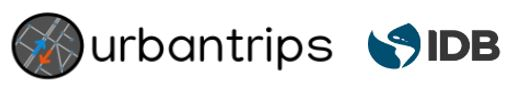

In [4]:
image